In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def import_and_clean_data():
    # Import the data
    df = pd.read_csv('fcc-forum-pageviews (1).csv', parse_dates=['date'], index_col='date')
    
    # Clean the data by removing the top and bottom 2.5%
    df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
    
    return df

df = import_and_clean_data()

In [7]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['value'], color='red', linewidth=1)
    
    # Title and labels
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    
    # Save image and return the figure
    fig.savefig('line_plot.png')
    return fig

In [8]:
def draw_bar_plot():
    # Prepare data for bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
    
    # Draw bar plot
    fig = df_bar.plot(kind='bar', figsize=(12, 6)).figure
    plt.title('Average Daily Page Views per Month')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months', fontsize=10)
    
    # Save image and return figure
    fig.savefig('bar_plot.png')
    return fig


In [9]:
def draw_box_plot():
    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')
    
    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Year-wise Box Plot
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    
    # Month-wise Box Plot
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')
    
    # Save image and return figure
    fig.savefig('box_plot.png')
    return fig


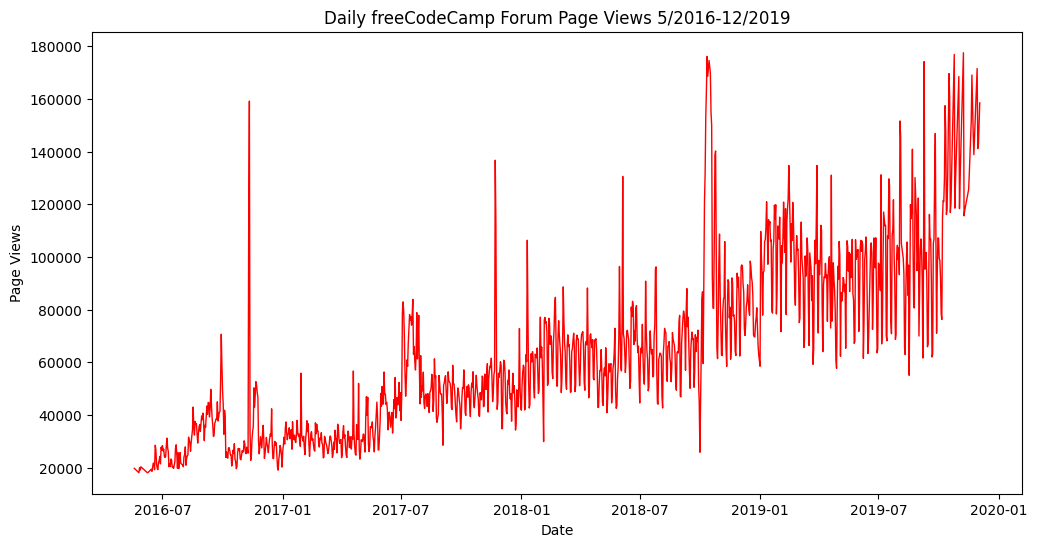

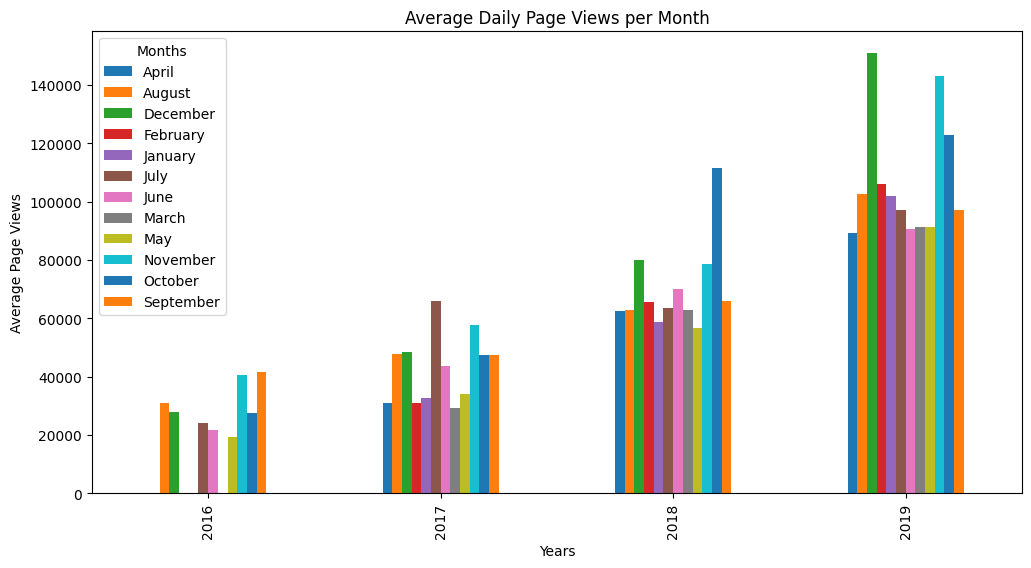

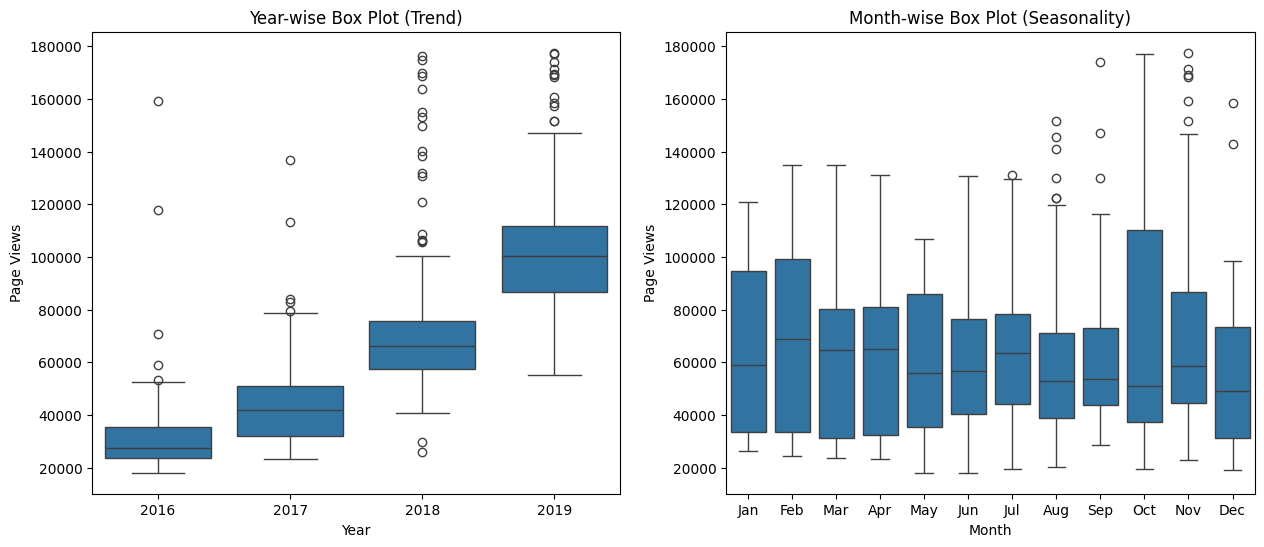

In [10]:
if __name__ == "__main__":
    draw_line_plot()
    draw_bar_plot()
    draw_box_plot()
